**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>

**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import math,statistics
from statistics import mean
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn import metrics
from sklearn.metrics import silhouette_score

# Part1

In [2]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print(trainX.shape,trainy.shape,testX.shape,testy.shape)
X = np.concatenate((trainX,testX),axis=0)
y = np.concatenate((trainy,testy),axis=0)
print(X.shape,y.shape)
X = X.reshape(70000,784)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle = True,random_state=123)
print(X_train.shape,X_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(70000, 28, 28) (70000,)
(49000, 784) (21000, 784)


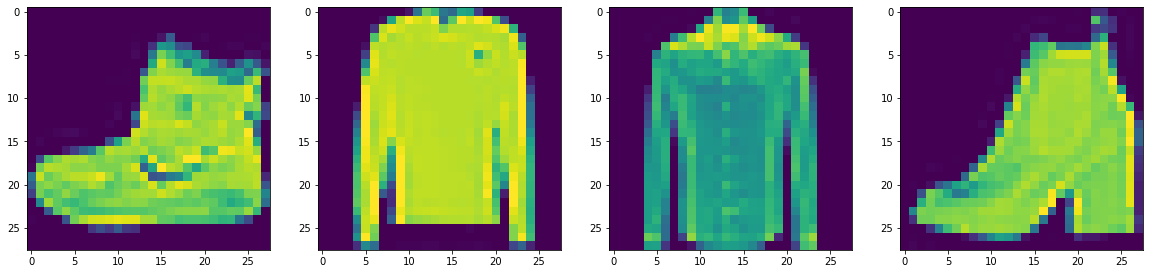

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(X[0].reshape(28,28))
plt.subplot(142)
plt.imshow(X[490].reshape(28,28))
plt.subplot(143)
plt.imshow(X[590].reshape(28,28))
plt.subplot(144)
plt.imshow(X[800].reshape(28,28))
plt.show()

In [ ]:
(unique, counts) = np.unique(y, return_counts=True)

frequencies = np.asarray((unique, counts))
print(frequencies)

[[   0    1    2    3    4    5    6    7    8    9]
 [7000 7000 7000 7000 7000 7000 7000 7000 7000 7000]]


In [ ]:
def euclidean(centroids,dataPoint):
    dist_list = []
    for i in centroids:
        dst = np.linalg.norm(i-dataPoint)
        dist_list.append(dst)
    return dist_list
 
def manhatten(centroids,dataPoint):
    dist_list = []
    for i in centroids:
        dst = np.sum(abs(i-dataPoint))
        dist_list.append(dst)
    return dist_list

#### Forgy method are used to initialized the cluster centroid , which are initialize centre by random data point assigned to a each cluster

#### Random partition are also used to initialise the cluster ,in which data partitioned in k cluster after that we computing the of eack cluster and assigned as centroid of cluster

In [ ]:
def kmeans(metric,k,itr,X,initialize_cen):
    centroids = []
    if initialize_cen == 'forgy':
        X_len = len(X)
        for i in range(0,k):
            a = np.random.randint(0,X_len-1)
            centroids.append(X[a])
    if initialize_cen == 'random':
        idx = np.random.choice(range(0, k), replace = True, size = X.shape[0])
        mean = []
        for i in range(k):
            mean.append(X[idx == i].mean(axis=0))
        centroids = np.concatenate([val[ None, :] for val in mean], axis = 0)
    final_cluster = None    
    for it in range(0,itr):
        #creating number of cluster
        clusters = []
        for cls in range(k):
            clusters.append([])
        for x in X:
            dist_ = None
            if metric == "euclidean":
                dist_ = euclidean(centroids,x)
            if metric == "manhatten":
                dist_ = manhatten(centroids,x)
            minpos = dist_.index(min(dist_))
            clusters[minpos].append(x)
        for i in range(k):
            centroids[i]= np.mean(clusters[i],axis=0)
        final_cluster = clusters
    return centroids,final_cluster
# centroids = kmeans("euclidean",10,10,X_train,'random')
# print(centroids.shape)

#### Elbow method are used to detremine optimal value of K(number of cluster) on the basis of Distortion and Inertia

In [ ]:
def elbow(X,y):
    dist_list = []
    for k in range(1,13):
        centroids,clusters = kmeans("euclidean",k,10,X,"forgy")
        print(len(centroids),len(clusters))
        inertia = 0
        for j in range(0,len(clusters)):
            inertia+=np.sum((np.array(clusters[j])-np.array(centroids[j]))**2)
        print(inertia)
        dist_list.append(inertia)
    return dist_list

In [ ]:
Dist_list = elbow(X,y)

1 1
310314631973.5135
2 2
245034446221.03436
3 3
209736065802.794
4 4
190012711943.0259
5 5
182206350430.4613
6 6
167066864340.44907
7 7
161415544431.92365
8 8
156806073032.32025
9 9
156316832033.70465
10 10
150086371072.70624
11 11
142915944031.68387
12 12
140024887029.03732


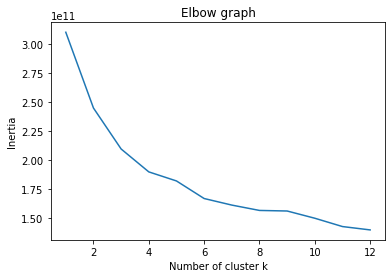

In [ ]:
x_data = Dist_list
y_data = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(y_data, x_data, label='Elbow graph for Max distance vs number of cluster')
plt.xlabel('Number of cluster k')
plt.ylabel('Inertia')
plt.title('Elbow graph')
plt.show()

####  silhouette algorithm is determine the optimal number of clusters for an unsupervised learning technique

(10000, 784) (10000,)


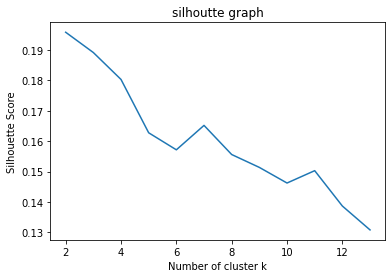

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
def silhouette(X,y):
  silhouette_scores = [] 
  for i in range(2,14):
    silhouette_scores.append(silhouette_score(X, KMeans(n_clusters = i).fit_predict(X)))
  return silhouette_scores
X1_ = X_train[:10000]
y1_ = y_train[:10000]
print(X1_.shape,y1_.shape)
silhouette_scores = silhouette(X1_,y1_)

x_data = silhouette_scores
y_data = [2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(y_data, x_data, label='silhoutte')
plt.xlabel('Number of cluster k')
plt.ylabel('Silhouette Score')
plt.title('silhoutte graph')
plt.show()

In [ ]:
def labelized_cend(X,y,centroids):
    k = len(centroids)
    centroids_label = []
    centroid_lst=[]
    for i in range(k):
        centroid_lst.append([])
    for t in range(0,len(X)):
        min_dist=100000
        min_pos=0
        for j in range(k):
            dist_c = np.linalg.norm(X[t] - centroids[j])
            if min_dist > dist_c:
                min_dist= dist_c
                min_pos=j
        centroid_lst[min_pos].append(y[t])    
    for i in range(k):
        if len(centroid_lst[i])!= 0:
            var= statistics.mode(centroid_lst[i])
            centroids_label.append(var)
    return centroids_label
# centroids_label = labelized_cend(X_train,y_train,centroids)
# print(centroids_label)

In [ ]:
def predict(X,metric,centroids,centroid_label):
    pred_lst=[]
    for x in X:
        dist_li=None
        if metric == "euclidean":
            dist_li = euclidean(centroids,x)
        if metric == "manhatten":
            dist_li = manhatten(centroids,x)
        indx = dist_li.index(min(dist_li))
        pred_lst.append(centroid_label[indx])
    return pred_lst
# y_pred = predict(X_test,"euclidean",centroids,centroids_label)
# print(len(y_pred))

In [ ]:
centroids,clusters = kmeans("euclidean",10,10,X_train,'random')
print(centroids.shape)
print(centroids)
centroids_label = labelized_cend(X_train,y_train,centroids)
print(centroids_label)
y_pred = predict(X_test,"euclidean",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

(10, 784)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.46592512e-04 7.15443259e-05 ... 3.88501284e-02
  1.79806126e-02 1.94158186e-03]
 [1.70222424e-04 4.43839209e-04 1.99894223e-04 ... 3.19350618e-02
  1.38937100e-02 3.00926544e-03]
 ...
 [2.08906803e-04 7.42779744e-05 6.94477014e-05 ... 7.55630605e-05
  1.54210327e-05 1.27223520e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.57234899e-04
  2.14918708e-04 1.32579722e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[7, 9, 8, 5, 0, 6, 4, 3, 9, 1]
Homogenity score is:  0.5489921808029882


In [ ]:
for i in range(len(clusters)):
    print("cluster :",len(clusters[i]))

cluster : 5839
cluster : 2757
cluster : 2203
cluster : 3901
cluster : 3054
cluster : 7308
cluster : 8579
cluster : 5086
cluster : 4215
cluster : 6058


In [ ]:
centroids,clusters = kmeans("euclidean",10,10,X_train,"forgy")
centroids_label = labelized_cend(X_train,y_train,centroids)
print(centroids_label)
y_pred = predict(X_test,"euclidean",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

[1, 5, 9, 0, 2, 8, 8, 7, 6, 4]
Homogenity score is:  0.5473288013808523


In [ ]:
centroids,clusters = kmeans("manhatten",10,10,X_train,"random")
# print(centroids)
centroids_label = labelized_cend(X_train,y_train,centroids)
print(centroids_label)
y_pred = predict(X_test,"manhatten",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

[2, 0, 4, 7, 6, 9, 1, 8, 8, 9]
Homogenity score is:  0.5346139047048407


In [ ]:
centroids,clusters = kmeans("manhatten",10,10,X_train,"forgy")
# print(centroids)
centroids_label = labelized_cend(X_train,y_train,centroids)
print(centroids_label)
y_pred = predict(X_test,"manhatten",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

[4, 0, 6, 6, 2, 9, 7, 1, 8, 5]
Homogenity score is:  0.5184993278970372


### from normalised data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
centroids,clusters = kmeans("euclidean",10,10,X_train,"forgy")
centroids_label = labelized_cend(X_train,y_train,centroids)
print(centroids_label)
y_pred = predict(X_test,"euclidean",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

[9, 5, 8, 9, 2, 1, 3, 6, 0, 7]
Homogenity score is:  0.5141335197334767


In [ ]:
centroids,clusters = kmeans("euclidean",10,10,X_train,"random")
centroids_label = labelized_cend(X_train,y_train,centroids)
print(centroids_label)
y_pred = predict(X_test,"euclidean",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

[9, 6, 3, 1, 8, 3, 7, 5, 0, 2]
Homogenity score is:  0.53916734313987


from the above to result based on the euclidean and mahatten distance metric , conclude that the result found without normalized with normalized slightly differ , not much difference observed, because datapoit are not much sparsely distributed . 

## Kmean++

In [ ]:
#implement Kmeans++ from scratch
def Kmeansplusplus(X,K):
    centroids_ = [] 
    random_point = np.random.randint(1,X.shape[0])
    centroids_.append(X[random_point])
#     print("Initialise index of centroids 1 :",random_point)
    
    for c in range(K-1):
        dist_list = []
        for x in X:
            min_dst = np.inf
            for i in range(len(centroids_)):
                dist = np.sum((x-centroids_[i])**2)
                if dist<min_dst:
                    min_dst=dist
            dist_list.append(min_dst)
        dist_list = np.array(dist_list)
        indx = np.argmax(dist_list)
#         print("Initialise index of centroids",c+2,":",indx)
        next_centroids = X[indx]
        centroids_.append(next_centroids)
    return centroids_

In [ ]:
def kmean_pp(metric,k,itr,X):
    centroids = Kmeansplusplus(X_train,k)
    final_cluster = None    
    for it in range(0,itr):
        #creating number of cluster
        clusters = []
        for cls in range(k):
            clusters.append([])
        for x in X:
            dist_ = None
            if metric == "euclidean":
                dist_ = euclidean(centroids,x)
            if metric == "manhatten":
                dist_ = manhatten(centroids,x)
            minpos = dist_.index(min(dist_))
            clusters[minpos].append(x)
        for i in range(k):
            centroids[i]= np.mean(clusters[i],axis=0)
        final_cluster = clusters
    return centroids,final_cluster

In [ ]:
centroids,clusters = kmean_pp("manhatten",10,10,X_train)
centroids_label = labelized_cend(X_train,y_train,centroids)
print(centroids_label)
y_pred = predict(X_test,"manhatten",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Initialise index of centroids 1 : 16756
Initialise index of centroids 2 : 17935
Initialise index of centroids 3 : 48344
Initialise index of centroids 4 : 5637
Initialise index of centroids 5 : 16290
Initialise index of centroids 6 : 23272
Initialise index of centroids 7 : 20884
Initialise index of centroids 8 : 36331
Initialise index of centroids 9 : 6670
Initialise index of centroids 10 : 31098
[1, 9, 7, 5, 0, 8, 4, 8, 2, 6]
Homogenity score is:  0.5348679337828235


In [ ]:
centroids,clusters = kmean_pp("euclidean",10,10,X_train)
centroids_label = labelized_cend(X_train,y_train,centroids)
print(centroids_label)
y_pred = predict(X_test,"euclidean",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Initialise index of centroids 1 : 17928
Initialise index of centroids 2 : 17935
Initialise index of centroids 3 : 48917
Initialise index of centroids 4 : 25930
Initialise index of centroids 5 : 16290
Initialise index of centroids 6 : 31098
Initialise index of centroids 7 : 23272
Initialise index of centroids 8 : 40567
Initialise index of centroids 9 : 25136
Initialise index of centroids 10 : 8494
[1, 0, 9, 7, 0, 5, 8, 4, 2, 8]
Homogenity score is:  0.5689804922377223


In [ ]:
def elbow(X,y):
    dist_list = []
    for k in range(2,13):
        centroids,clusters = kmean_pp("euclidean",k,10,X)
        print(len(centroids),len(clusters))
        inertia = 0
        for j in range(0,len(clusters)):
            inertia+=np.sum((np.array(clusters[j])-np.array(centroids[j]))**2)
        print(inertia)
        dist_list.append(inertia)
    return dist_list

In [ ]:
Dist_list = elbow(X,y)

2 2
245742194987.20813
3 3
209945123495.15192
4 4
198544141924.352
5 5
179087907242.44974
6 6
172529023528.97052
7 7
160807429054.87482
8 8
154180288282.91385
9 9
150428983988.70633
10 10
149144745186.05887
11 11
146658446717.65564
12 12
138237586829.4457


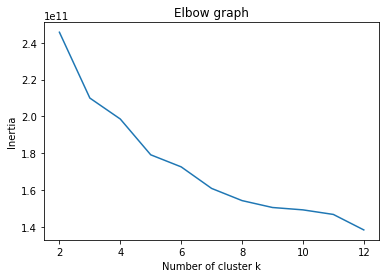

In [ ]:
x_data = Dist_list
y_data = [2,3,4,5,6,7,8,9,10,11,12]
plt.plot(y_data, x_data, label='Elbow graph for Max distance vs number of cluster')
plt.xlabel('Number of cluster k')
plt.ylabel('Inertia')
plt.title('Elbow graph')
plt.show()

### Error

error: compute: (cii-xi)^2+(c2i-xi)^2+......+(cki-xi)^2 = total error

for k = 10 we computed interia i.e is also equal to the error for k number of cluster which is : 150086371072.70624


#### visualise data using T-SNE 

(20000, 784) (20000,)


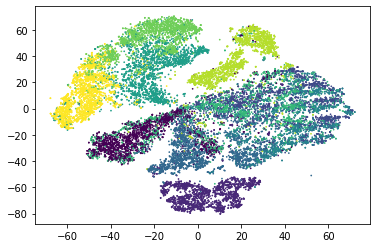

In [ ]:
from sklearn.manifold import TSNE
X1 = X[:20000,:]
y1 = y[:20000]
print(X1.shape,y1.shape)
perplexity = 40
tsne = TSNE(n_components=2, perplexity=perplexity)
X_2d = tsne.fit_transform(X1)
plt.scatter(X_2d[:,0],X_2d[:,1], c = y1, s = 0.5)

## with Sklearn learn model 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
kmeans.labels_

array([5, 3, 6, ..., 6, 5, 9], dtype=int32)

In [ ]:
cluster_cen = kmeans.cluster_centers_
y_pred = kmeans.predict(X_test)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Homogenity score is:  0.5258971195756137


Homogenity score using custom model and sklearn model is apporxemately same which is 

custom model : 51-55

sklearn model : 52

Not much difference observed

### PART2

In [1]:
import pandas as pd
data = pd.read_csv("data.csv",header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,[1.0866963863372803,2.371966,5.534521,3.771174,1.877307,3.599094,5.784208,3.871398,2.878446,4.109515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],Ankle Boot
1,[5.086210250854492,3.526383,3.173435,3.100720,4.561333,4.389340,3.113444,2.403284,4.039598,5.388708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],T-Shirt
2,[1.211804747581482,2.946491,2.014766,0.606742,1.302111,2.517385,1.538354,0.719057,1.375769,2.441072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],T-Shirt
3,[3.1817357540130615,3.386448,1.852063,1.134460,2.596234,3.389648,1.662953,1.038565,2.676021,3.362122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],Dress
4,[3.5364575386047363,5.801409,3.549685,1.483723,3.400284,6.017810,3.560772,0.938271,3.958203,6.236764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],T-Shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,[0.011476174928247929,0.059515,0.469514,1.194045,0.512581,0.107612,0.759934,1.375888,2.015975,0.665791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],Sandal
59996,[2.134517192840576,6.054185,4.831404,1.715127,2.063895,5.509420,4.753547,1.759201,1.910486,5.196002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],Trouser
59997,[5.573720455169678,6.370377,4.076251,1.958915,5.387075,6.138871,4.519176,1.817328,4.937860,6.034277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],Dress
59998,[2.1300206184387207,1.250919,1.189124,1.248351,2.066808,1.304677,1.205101,1.238864,1.706910,1.652737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],T-Shirt


Here we see that column 0 contain square open braces so ,extract from braces from column and in 191 column contain close open braces so extract this also from column

In [2]:
data.iloc[:,0] = data.iloc[:,0].str.replace("[","")
data.iloc[:,0]

<ipython-input-2-a8ffd1e3ffef>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data.iloc[:,0] = data.iloc[:,0].str.replace("[","")


0          1.0866963863372803
1           5.086210250854492
2           1.211804747581482
3          3.1817357540130615
4          3.5364575386047363
                 ...         
59995    0.011476174928247929
59996       2.134517192840576
59997       5.573720455169678
59998      2.1300206184387207
59999      0.4793839752674103
Name: 0, Length: 60000, dtype: object

In [3]:
data.iloc[:,191] = data.iloc[:,191].str.replace("]","")
data.iloc[:,191]

<ipython-input-3-f2e30a74991a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data.iloc[:,191] = data.iloc[:,191].str.replace("]","")


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
59995     0.0
59996     0.0
59997     0.0
59998     0.0
59999     0.0
Name: 191, Length: 60000, dtype: object

In [4]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,1.0866963863372803,2.371966,5.534521,3.771174,1.877307,3.599094,5.784208,3.871398,2.878446,4.109515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ankle Boot
1,5.086210250854492,3.526383,3.173435,3.100720,4.561333,4.389340,3.113444,2.403284,4.039598,5.388708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T-Shirt
2,1.211804747581482,2.946491,2.014766,0.606742,1.302111,2.517385,1.538354,0.719057,1.375769,2.441072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T-Shirt
3,3.1817357540130615,3.386448,1.852063,1.134460,2.596234,3.389648,1.662953,1.038565,2.676021,3.362122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dress
4,3.5364575386047363,5.801409,3.549685,1.483723,3.400284,6.017810,3.560772,0.938271,3.958203,6.236764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T-Shirt


In [5]:
print(data.iloc[0:,192].unique())

[' Ankle Boot' ' T-Shirt' ' Dress' ' Pullover' ' Sneaker' ' Sandal'
 ' Trouser' ' Shirt' ' Coat' ' Bag']


In [6]:
dict_y = {' Ankle Boot':1, ' T-Shirt':2, ' Dress':3, ' Pullover':4, ' Sneaker':5, ' Sandal':6,
 ' Trouser':7, ' Shirt':8, ' Coat':9, ' Bag':10}

In [7]:
X = data.drop(data.columns[192],axis=1).values.astype(float)
X.shape

(60000, 192)

In [8]:
y = data[data.columns[192]].map(dict_y).values.astype(float)
y,y.shape

(array([1., 2., 2., ..., 3., 2., 6.]), (60000,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle =True,random_state=123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(42000, 192) (18000, 192) (42000,) (18000,)


In [ ]:
centroids,clusters = kmeans("euclidean",10,10,X_train,"forgy")
centroids_label = labelized_cend(X_train,y_train,centroids)
y_pred = predict(X_test,"euclidean",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Homogenity score is:  0.4931259262609381


In [ ]:
centroids,clusters = kmeans("euclidean",10,10,X_train,"random")
centroids_label = labelized_cend(X_train,y_train,centroids)
y_pred = predict(X_test,"euclidean",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Homogenity score is:  0.49516132587495393


In [ ]:
centroids,clusters = kmeans("manhatten",10,10,X_train,"forgy")
centroids_label = labelized_cend(X_train,y_train,centroids)
y_pred = predict(X_test,"manhatten",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Homogenity score is:  0.5081719192907506


In [ ]:
centroids,clusters = kmeans("manhatten",10,10,X_train,"random")
centroids_label = labelized_cend(X_train,y_train,centroids)
y_pred = predict(X_test,"manhatten",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Homogenity score is:  0.47146015284792725


## ERROR

error: compute: (cii-xi)^2+(c2i-xi)^2+......+(cki-xi)^2 = total error

for k = 10  we computed interia i.e is also equal to the error for k number of cluster which is :  3315860.6824358497



## kmeanpp

In [ ]:
centroids,clusters = kmean_pp("manhatten",10,10,X_train)
centroids_label = labelized_cend(X_train,y_train,centroids)
y_pred = predict(X_test,"manhatten",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Initialise index of centroids 1 : 5320
Initialise index of centroids 2 : 12773
Initialise index of centroids 3 : 29156
Initialise index of centroids 4 : 31727
Initialise index of centroids 5 : 10055
Initialise index of centroids 6 : 26433
Initialise index of centroids 7 : 13543
Initialise index of centroids 8 : 20949
Initialise index of centroids 9 : 39276
Initialise index of centroids 10 : 13154
Homogenity score is:  0.5193989753406191


In [ ]:
centroids,clusters = kmean_pp("euclidean",10,10,X_train)
centroids_label = labelized_cend(X_train,y_train,centroids)
y_pred = predict(X_test,"euclidean",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Initialise index of centroids 1 : 32576
Initialise index of centroids 2 : 12773
Initialise index of centroids 3 : 29156
Initialise index of centroids 4 : 27372
Initialise index of centroids 5 : 13154
Initialise index of centroids 6 : 13543
Initialise index of centroids 7 : 11893
Initialise index of centroids 8 : 1258
Initialise index of centroids 9 : 6054
Initialise index of centroids 10 : 1851
Homogenity score is:  0.49546643524388595


## kmean applied on normalised data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
centroids,clusters = kmeans("euclidean",10,10,X_train,"forgy")
centroids_label = labelized_cend(X_train,y_train,centroids)
print(centroids_label)
y_pred = predict(X_test,"euclidean",centroids,centroids_label)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

[6.0, 6.0, 9.0, 2.0, 10.0, 5.0, 5.0, 1.0, 1.0, 7.0]
Homogenity score is:  0.5501339983779963


## Kmean using sklearn model

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
kmeans.labels_

array([4, 6, 9, ..., 3, 2, 6], dtype=int32)

In [ ]:
cluster_cen = kmeans.cluster_centers_
y_pred = kmeans.predict(X_test)
print("Homogenity score is: ", homogeneity_score(y_pred, y_test))

Homogenity score is:  0.5290957739201664


## elbow ...

In [ ]:
Dist_list = elbow(X,y)

1 1
12977361.84880909
2 2
8465405.264416598
3 3
6779115.919915718
4 4
5338188.191346815
5 5
4815686.498806672
6 6
4299018.189567269
7 7
4044944.0283103664
8 8
3740825.560437019
9 9
3402322.2262481377
10 10
3315860.6824358497
11 11
3143128.0694780266
12 12
3242974.650658776


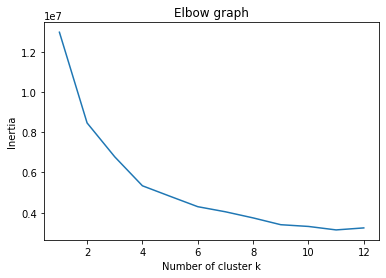

In [ ]:
x_data = Dist_list
y_data = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(y_data, x_data, label='Elbow graph for Max distance vs number of cluster')
plt.xlabel('Number of cluster k')
plt.ylabel('Inertia')
plt.title('Elbow graph')
plt.show()

#### silhoutte..

(10000, 192) (10000,)


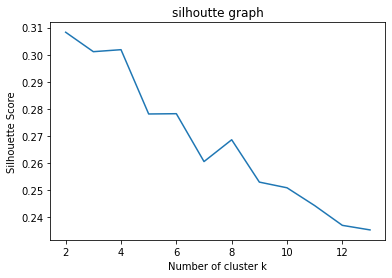

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
def silhouette(X,y):
    silhouette_scores = [] 
    for i in range(2,14):
        silhouette_scores.append(silhouette_score(X, KMeans(n_clusters = i).fit_predict(X)))
    return silhouette_scores
X1_ = X_train[:10000]
y1_ = y_train[:10000]
print(X1_.shape,y1_.shape)
silhouette_scores = silhouette(X1_,y1_)

x_data = silhouette_scores
y_data = [2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(y_data, x_data, label='silhoutte')
plt.xlabel('Number of cluster k')
plt.ylabel('Silhouette Score')
plt.title('silhoutte graph')
plt.show()

(10000, 192) (10000,)


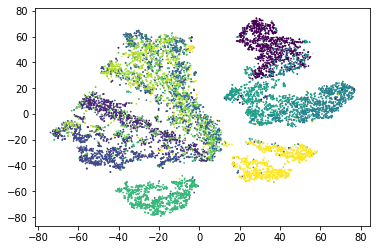

In [ ]:
from sklearn.manifold import TSNE
X1 = X[:10000,:]
y1 = y[:10000]
print(X1.shape,y1.shape)
perplexity = 40
tsne = TSNE(n_components=2, perplexity=perplexity)
X_2d = tsne.fit_transform(X1)
plt.scatter(X_2d[:,0],X_2d[:,1], c = y1, s = 0.5)